# Logistic Regression | Name :Sushmitha Nagarajan | ID : 1001556348

# ASSIGNMENT 2

### Import all the packages necessary

In [8]:
#Import all the packages
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### Split the data for training instances for random multivariate normal distribution

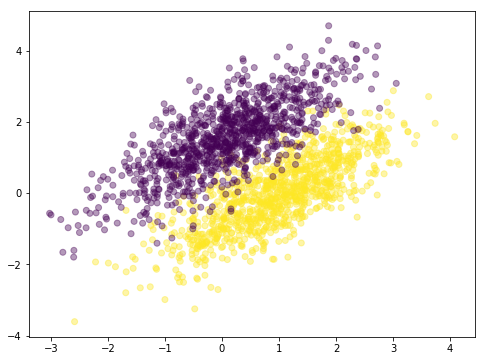

In [9]:
training_instance_x1= np.random.multivariate_normal([1, 0], [[1, 0.75], [0.75, 1]], 1000)
training_instance_x2 = np.random.multivariate_normal([0, 1.5], [[1, 0.75], [0.75, 1]], 1000)
split_data_train=np.vstack((training_instance_x1,training_instance_x2)).astype(np.float32)
split_label_train = np.hstack(((np.ones(1000)),(np.zeros(1000))))
plt.figure(figsize=(8,6))
plt.scatter(split_data_train[:, 0], split_data_train[:, 1],
            c = split_label_train, alpha = .4)

### Split the data for testing instances for random multivariate normal distribution

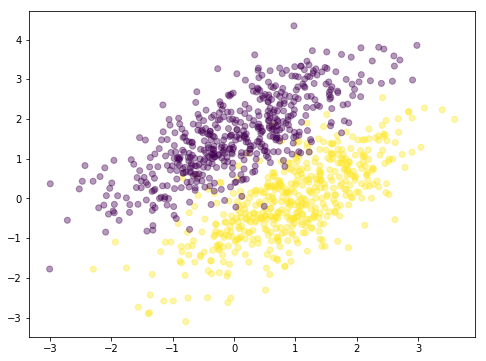

In [10]:
testing_instance_x1 = np.random.multivariate_normal([1, 0], [[1, 0.75], [0.75, 1]], 500)
testing_instance_x2= np.random.multivariate_normal([0, 1.5], [[1, 0.75], [0.75, 1]], 500)
split_data_test=np.vstack((testing_instance_x1,testing_instance_x2)).astype(np.float32)
split_label_test = np.hstack(((np.ones(500)),(np.zeros(500))))
test1_label = np.hstack(((np.ones(1000)), (np.zeros(1000))))
plt.figure(figsize=(8,6))
plt.scatter(split_data_test[:, 0], split_data_test[:, 1],
            c = split_label_test, alpha = .4)

### Online Training function 

In [11]:
def online_training_function(attribute_values,target,lr_rate,num_of_iter):
    interpret = np.ones((split_data_train.shape[0],1))
    attribute_values = np.hstack((interpret, split_data_train))
    weights_of_online= np.ones(attribute_values.shape[1])
    cross_entropy_initial=0
    for i in range(num_of_iter):
        
        scores = np.dot(attribute_values, weights_of_online)
        sigmoid_function=(1/(1+np.exp(-scores)))
        cross_entropy1=-target*np.log(sigmoid_function)
        cross_entropy2=(1-target)*np.log(1-sigmoid_function)
        cross_entropy3=cross_entropy1-cross_entropy2
        cross_entropy=cross_entropy3.sum()/len(target)
        gradient_descent = np.dot(attribute_values.T, (scores-split_label_train))/split_label_train.size
        weights_of_online -= gradient_descent*lr_rate
        #print("did i come here")
        if cross_entropy==cross_entropy_initial:
#             print("did i come here")
            print("Evaluvation for iterations")
            print('Iteration numbers= '+str(i)+ " cross_entropy_errors= "+ str(cross_entropy))
            break 
        cross_entropy_initial=cross_entropy
    return(weights_of_online)
    

### Online training weights calculation for three diffrent learning rates

In [12]:
online_training_weights = online_training_function(split_data_train, split_label_train,lr_rate=0.01,num_of_iter=10000)
print("Learning Rate : 0.01")
print("Edge weights earned")
print(online_training_weights)

Evaluvation for iterations
Iteration numbers= 4291 cross_entropy_errors= 0.5577344302252368
Learning Rate : 0.01
Edge weights earned
[ 0.58118695  0.2968565  -0.31144269]


In [13]:
online_training_weights = online_training_function(split_data_train, split_label_train,lr_rate=1,num_of_iter=10000)
print("Learning Rate : 1")
print("Edge weights earned")
print(online_training_weights)

C:\Users\Sushmitha Nagarajan\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Sushmitha Nagarajan\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Sushmitha Nagarajan\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Sushmitha Nagarajan\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Sushmitha Nagarajan\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


Learning Rate : 1
Edge weights earned
[nan nan nan]


In [14]:
online_training_weights = online_training_function(split_data_train, split_label_train,lr_rate=0.1,num_of_iter=10000)
print("Learning Rate : 0.1")
print("Edge weights earned")
print(online_training_weights)

Evaluvation for iterations
Iteration numbers= 465 cross_entropy_errors= 0.5577344302252648
Learning Rate : 0.1
Edge weights earned
[ 0.58118695  0.2968565  -0.31144269]


### Create a model for Logistic Regression using sklearn and fit the weights

In [15]:
model = LogisticRegression(fit_intercept=True, C = 0.01)
model.fit(split_data_train, split_label_train)

print (model.intercept_, model.coef_)


[0.28460195] [[ 1.31084364 -1.43729144]]


### Accuracy calculation between Model training and SKlearn model

In [16]:
labelled_data = np.hstack((np.ones((split_data_train.shape[0], 1)),
                                 split_data_train))

final_scores = np.dot(labelled_data, online_training_weights)
preds = np.round((1/(1+np.exp(-final_scores))))

print('Accuracy comparison between Sklearn model and Online training function')
print ('Accuracy in Online training function: {0}'.format((preds == split_label_train).sum().astype(float) / len(preds)))
print ('Accuracy in sk-learn: {0}'.format(model.score(split_data_train, split_label_train)))

Accuracy comparison between Sklearn model and Online training function
Accuracy in Online training function: 0.6385
Accuracy in sk-learn: 0.9565


### Accuracy between model testing and SKlearn model

In [17]:
labelled_data = np.hstack((np.ones((split_data_test.shape[0], 1)),
                                 split_data_test))

final_scores = np.dot(labelled_data, online_training_weights)
preds = np.round((1/(1+np.exp(-final_scores))))
print('Accuracy comparison between Sklearn model and Online training function')
print ('Accuracy in Online training function: {0}'.format((preds == split_label_test).sum().astype(float) / len(preds)))
print ('Accuracy in sk-learn: {0}'.format(model.score(split_data_test, split_label_test)))

Accuracy comparison between Sklearn model and Online training function
Accuracy in Online training function: 0.656
Accuracy in sk-learn: 0.962


### ROC Curve for Online Training

Accuracy  of ROC Curve: 0.656


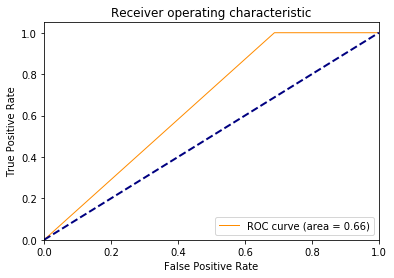

In [18]:
from sklearn.metrics import auc
labelled_data = np.hstack((np.ones((split_data_test.shape[0], 1)),
                                 split_data_test))

final_scores = np.dot(labelled_data, online_training_weights)
preds = np.round(1/(1+np.exp(-final_scores)))
cf_matrix = metrics.confusion_matrix(split_label_test, preds)


TN = cf_matrix[0][0] #TRUE NEGATIVE
FN = cf_matrix[1][0] #FALSE NEGATIVE
TP = cf_matrix[1][1] #TRUE POSITIVE
FP = cf_matrix[0][1] #FALSE POSITIVE

TPR = TP/(TP+FN) #SENSITIVITY
FPR = FP/(FP+TN) #FALSE POSITIVE RATE

ACC = (TP+TN)/(TP+FP+FN+TN) #ACCURACY

print("Accuracy  of ROC Curve:",ACC)



fpr = [0.0, FPR, 1.0]

tpr = [0.0, TPR, 1.0]

auc_area = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)'%auc_area )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Batch Training 

### Batch Training Function for logistic regression

In [19]:
def batch_training_function(attribute_values,target,lr_rate,num_of_iter):
    interpret = np.ones((split_data_train.shape[0],1))
    attribute_values = np.hstack((interpret, split_data_train))
    weights_of_online= np.ones(attribute_values.shape[1])
    cross_entropy_initial=0
    for i in range(num_of_iter):
        
        scores = np.dot(attribute_values, weights_of_online)
        sigmoid_function=(1/(1+np.exp(-scores)))
        cross_entropy1=-target*np.log(sigmoid_function)
        cross_entropy2=(1-target)*np.log(1-sigmoid_function)
        cross_entropy3=cross_entropy1-cross_entropy2
        cross_entropy=cross_entropy3.sum()/len(target)
        #print("did i come here")
        if cross_entropy==cross_entropy_initial:
#             print("did i come here")
            print("Evaluvation for iterations")
            print('Iteration numbers= '+str(i)+ " cross_entropy_errors= "+ str(cross_entropy))
            break 
        cross_entropy_initial=cross_entropy
    gradient_descent = np.dot(attribute_values.T, (scores-split_label_train))/split_label_train.size
    weights_of_online -= gradient_descent*lr_rate
    return(weights_of_online)

### Batch training weights for different learning rates

Evaluvation for iterations
Iteration numbers= 1 cross_entropy_errors= 1.59463511856366
Learning Rate : 0.01
Edge Weights Earned
[0.98217138 0.97672235 0.9617927 ]
Accuracy  of ROC Curve: 0.483


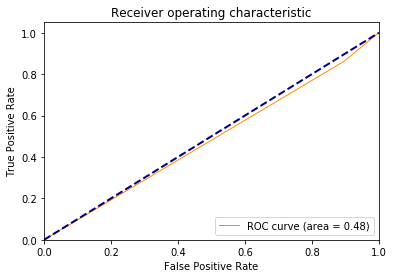

In [20]:
batch_training_weights = batch_training_function(split_data_train, split_label_train,lr_rate=0.01,num_of_iter=10000)
print("Learning Rate : 0.01")
print("Edge Weights Earned")
print(batch_training_weights)
from sklearn.metrics import auc
data_with_intercept = np.hstack((np.ones((split_data_test.shape[0], 1)),
                                 split_data_test))

final_scores = np.dot(data_with_intercept, batch_training_weights)
preds = np.round(1/(1+np.exp(-final_scores)))
cf_matrix = metrics.confusion_matrix(split_label_test, preds)

TN = cf_matrix[0][0] #TRUE NEGATIVE
FN = cf_matrix[1][0] #FALSE NEGATIVE
TP = cf_matrix[1][1] #TRUE POSITIVE
FP = cf_matrix[0][1] #FALSE POSITIVE

TPR = TP/(TP+FN) #SENSITIVITY
FPR = FP/(FP+TN) #FALSE POSITIVE RATE
ACC = (TP+TN)/(TP+FP+FN+TN) #ACCURACY

print("Accuracy  of ROC Curve:",ACC)
fpr = [0.0, FPR, 1.0]
tpr = [0.0, TPR, 1.0]

auc_area = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)'%auc_area )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [ ]:
batch_training_weights = batch_training_function(split_data_train, split_label_train,lr_rate=0.1,num_of_iter=10000)
print("Learning Rate : 0.1")
print("Edge Weights Earned")
print(batch_training_weights)
from sklearn.metrics import auc
data_with_intercept = np.hstack((np.ones((split_data_test.shape[0], 1)),
                                 split_data_test))

final_scores = np.dot(data_with_intercept, batch_training_weights)
preds = np.round(1/(1+np.exp(-final_scores)))
cf_matrix = metrics.confusion_matrix(split_label_test, preds)

TN = cf_matrix[0][0] #TRUE NEGATIVE
FN = cf_matrix[1][0] #FALSE NEGATIVE
TP = cf_matrix[1][1] #TRUE POSITIVE
FP = cf_matrix[0][1] #FALSE POSITIVE

TPR = TP/(TP+FN) #SENSITIVITY
FPR = FP/(FP+TN) #FALSE POSITIVE RATE
ACC = (TP+TN)/(TP+FP+FN+TN) #ACCURACY

print("Accuracy of ROC Curve :",ACC)
fpr = [0.0, FPR, 1.0]
tpr = [0.0, TPR, 1.0]

auc_area = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)'%auc_area )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [ ]:
batch_training_weights = batch_training_function(split_data_train, split_label_train,lr_rate=1,num_of_iter=10000)
print("Learning Rate : 1")
print("Edge Weights Earned")
print(batch_training_weights)
from sklearn.metrics import auc
data_with_intercept = np.hstack((np.ones((split_data_test.shape[0], 1)),
                                 split_data_test))

final_scores = np.dot(data_with_intercept, batch_training_weights)
preds = np.round(1/(1+np.exp(-final_scores)))
cf_matrix = metrics.confusion_matrix(split_label_test, preds)

TN = cf_matrix[0][0] #TRUE NEGATIVE
FN = cf_matrix[1][0] #FALSE NEGATIVE
TP = cf_matrix[1][1] #TRUE POSITIVE
FP = cf_matrix[0][1] #FALSE POSITIVE

TPR = TP/(TP+FN) #SENSITIVITY
FPR = FP/(FP+TN) #FALSE POSITIVE RATE
ACC = (TP+TN)/(TP+FP+FN+TN) #ACCURACY

print("Accuracy  of ROC Curve:",ACC)
fpr = [0.0, FPR, 1.0]
tpr = [0.0, TPR, 1.0]

auc_area = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)'%auc_area )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")

plt.show()

### Logistic Regression model using SKlearn model

In [ ]:
model = LogisticRegression(fit_intercept=True, C = 0.01)
model.fit(split_data_train, split_label_train)

print (model.intercept_, model.coef_)



### Accuracy evaluvation for Model training and sklearn model

In [ ]:
Labelled_data = np.hstack((np.ones((split_data_train.shape[0], 1)),
                                 split_data_train))

final_scores = np.dot(Labelled_data,batch_training_weights )
preds = np.round((1/(1+np.exp(-final_scores))))

print ('Accuracy from scratch: {0}'.format((preds == split_label_train).sum().astype(float) / len(preds)))
print ('Accuracy from sk-learn: {0}'.format(model.score(split_data_train, split_label_train)))

### Accuracy evaluvation for Model testing and SKlearn model

In [ ]:
Labelled_data = np.hstack((np.ones((split_data_test.shape[0], 1)),
                                 split_data_test))

final_scores = np.dot(Labelled_data, batch_training_weights)
preds = np.round((1/(1+np.exp(-final_scores))))

print ('Accuracy from scratch: {0}'.format((preds == split_label_test).sum().astype(float) / len(preds)))
print ('Accuracy from sk-learn: {0}'.format(model.score(split_data_test, split_label_test)))